In [1]:
# import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import tensorflow as tf

# models
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#  Import and read the train.csv and test.csv
train_df = pd.read_csv("./Resources/train.csv")
test_df = pd.read_csv("./Resources/test.csv")

In [2]:
# review the DataFrames
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# review the DataFrames
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Preprocessing

In [4]:
# Explore train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Explore the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
# Determine the number of unique values in each column.
class_count = train_df['Pclass'].value_counts()
class_count


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
# Determine the number of unique values in each column.
fare_count = train_df['Fare'].value_counts()
fare_count

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [8]:
# Determine the number of unique values in each column.
sibling_spouse = train_df['SibSp'].value_counts()
sibling_spouse


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [9]:
# Determine the number of unique values in each column.
parent_child = train_df['Parch'].value_counts()
parent_child

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [10]:
# Determine the number of unique values in each column.
embarked_count = train_df['Embarked'].value_counts()
embarked_count

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
# replacing the missing values in  
# the Embarked feature with S 
train_df = train_df.fillna({"Embarked": "S"}) 

In [12]:
# drop the non-beneficial ID columns (PassengerId) trom train_df
train_df = train_df.drop(columns = ['PassengerId'], axis=1)

In [13]:
# Drop the Cabin and Ticket fature
train_df = train_df.drop(columns = ['Cabin', 'Ticket'], axis=1)

In [14]:
#Create Embarked feature categories
ports = {"S": 0, "C": 1, "Q": 2}
train_df['Embarked'] = train_df['Embarked'].map(ports)

In [15]:
train_df['Fare'] = train_df['Fare'].fillna(0)
train_df['Fare'] = train_df['Fare'].astype(int)

In [16]:
# Extract title for each name in train and test datasets
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    int32  
 8   Embarked  891 non-null    int64  
 9   Title     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 66.3+ KB


In [18]:
# replace various titles with more common names 
train_df['Title'] = train_df['Title'].replace(['Lady', 'Capt', 'Col', 
                                                 'Don', 'Dr', 'Major', 
                                                 'Rev', 'Jonkheer', 'Dona'], 
                                                'Rare') 
  
train_df['Title'] = train_df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal') 
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss') 
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss') 
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs') 
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [19]:
# map each of the title groups to a numerical value 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
                 "Master": 4, "Royal": 5, "Rare": 6} 

train_df['Title'] = train_df['Title'].map(title_mapping) 

In [20]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 

,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,1.000000
5,6,0.285714


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    int32  
 8   Embarked  891 non-null    int64  
 9   Title     891 non-null    int64  
dtypes: float64(1), int32(1), int64(6), object(2)
memory usage: 66.3+ KB


In [22]:
# sort the ages into logical categories 
train_df["Age"] = train_df["Age"].fillna(-0.5) 
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] 
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 
          'Young Adult', 'Middle Adult', 'Older Adult', 'Senior'] 
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels=labels) 

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    int32   
 8   Embarked  891 non-null    int64   
 9   Title     891 non-null    int64   
 10  AgeGroup  891 non-null    category
dtypes: category(1), float64(1), int32(1), int64(6), object(2)
memory usage: 67.5+ KB


In [24]:
train_df[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean() 

C:\Users\mmmar\AppData\Local\Temp\ipykernel_27320\1443078664.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean()


,AgeGroup,Survived
0,Unknown,0.293785
1,Baby,0.704545
2,Child,0.360000
3,Teenager,0.428571
4,Young Adult,0.347826
5,Middle Adult,0.404545
6,Older Adult,0.400000
7,Senior,0.227273


In [25]:
# Use the title information to fill in the missing age values.
mr_age = train_df[train_df["Title"] == 1]["AgeGroup"].mode()  # Middle Adult 
miss_age = train_df[train_df["Title"] == 2]["AgeGroup"].mode()  # Young Adult 
mrs_age = train_df[train_df["Title"] == 3]["AgeGroup"].mode()  # Older Adult 
master_age = train_df[train_df["Title"] == 4]["AgeGroup"].mode()  # Baby 
royal_age = train_df[train_df["Title"] == 5]["AgeGroup"].mode()  # Older Adult 
rare_age = train_df[train_df["Title"] == 6]["AgeGroup"].mode()  # Older Adult 
  
age_title_mapping = {1: "Middle Adult", 2: "Young Adult", 
                     3: "Older Adult", 4: "Baby", 5: "Older Adult", 6: "Older Adult"} 
  
for x in range(len(train_df["AgeGroup"])): 
    if train_df["AgeGroup"][x] == "Unknown" and not pd.isnull(train_df["Title"][x]): 
        train_df["AgeGroup"][x] = age_title_mapping[train_df["Title"][x]] 

In [26]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7,0,1,Young Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71,1,3,Older Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7,0,2,Middle Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53,0,3,Middle Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8,0,1,Middle Adult


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    int32   
 8   Embarked  891 non-null    int64   
 9   Title     891 non-null    int64   
 10  AgeGroup  891 non-null    category
dtypes: category(1), float64(1), int32(1), int64(6), object(2)
memory usage: 67.5+ KB


In [28]:
train_df["Age"] = train_df["Age"].astype(int)

In [29]:
# Assigning numerical values to sex
sex_mapping = {"male": 0, "female": 1} 
train_df['Sex'] = train_df['Sex'].map(sex_mapping) 

In [30]:
# drop the non-beneficial ID columns "Name"
train_df= train_df.drop(['Name'], axis=1) 

In [31]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22,1,0,7,0,1,Young Adult
1,1,1,1,38,1,0,71,1,3,Older Adult
2,1,3,1,26,0,0,7,0,2,Middle Adult
3,1,1,1,35,1,0,53,0,3,Middle Adult
4,0,3,0,35,0,0,8,0,1,Middle Adult


In [32]:
# map each Age value to a numerical value 
age_mapping = {'Unknown': 0, 'Baby': 1, 'Child': 2, 'Teenager': 4, 
               'Young Adult': 5, 'Middle Adult': 6, 'Older Adult': 7,
               'Senior': 8} 
train_df['AgeGroup'] = train_df['AgeGroup'].map(age_mapping) 

train_df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22,1,0,7,0,1,5
1,1,1,1,38,1,0,71,1,3,7
2,1,3,1,26,0,0,7,0,2,6
3,1,1,1,35,1,0,53,0,3,6
4,0,3,0,35,0,0,8,0,1,6


In [33]:
train_df["AgeGroup"] = train_df["AgeGroup"].astype(int)

In [34]:
# drop "Age" now that we have AgeGroup"
# drop "fare" assuming that it does not impact survival
# drop "title" also
train_df= train_df.drop(['Age', 'Fare', "Title"], axis=1) 

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   Embarked  891 non-null    int64
 6   AgeGroup  891 non-null    int32
dtypes: int32(1), int64(6)
memory usage: 45.4 KB


## Create Random Forest Model

In [36]:
train_random = train_df.copy()

In [37]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = train_random['Survived']

# Separate the X variable, the features
X = train_random.drop(columns = 'Survived')

In [38]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 1
)

In [39]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [40]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [41]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [42]:
# Fitting the Random Forest Model
random_forest = RandomForestClassifier(n_estimators=100)

# Fitting the model
random_forest = random_forest.fit(X_train_scaled, y_train)

In [43]:
# Making Predictions Using the Random Forest Model
predictions = random_forest.predict(X_test_scaled)

## Model Evaluation


In [44]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = balanced_accuracy_score(y_test, predictions)

In [45]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,113,15
Actual 1,37,58


Accuracy Score : 0.7466694078947369
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       128
           1       0.79      0.61      0.69        95

    accuracy                           0.77       223
   macro avg       0.77      0.75      0.75       223
weighted avg       0.77      0.77      0.76       223



In [46]:
# Visualize the features by importance
random_importances = pd.DataFrame(sorted(zip(random_forest.feature_importances_, X.columns), reverse=True))
random_importances.set_index(random_importances[1], inplace=True)
random_importances.drop(columns=1, inplace=True)
random_importances.rename(columns={0: 'Feature Importances'}, inplace=True)
sorted_importances = random_importances.sort_values(by='Feature Importances')
sorted_importances

,Feature Importances
1,
Embarked,0.066045
Parch,0.075460
SibSp,0.099502
Pclass,0.182300
AgeGroup,0.192707
Sex,0.383987


<Axes: title={'center': 'Features Importances'}, ylabel='1'>

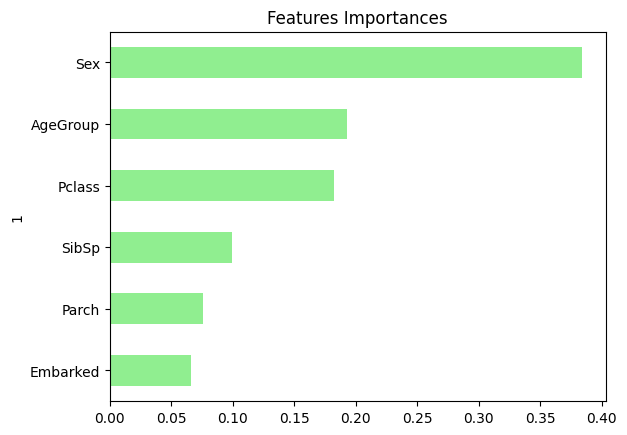

In [47]:
sorted_importances.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)